# Explanatory Model Analysis: Model Dependent (Marketing Campaign)

## Purpose

- Anda merasa yakin bahwa untuk mengetahui faktor apa saja yang dapat mempengaruhi seseorang untuk merespon suatu campaign dapat diekstrak langsung dari data tanpa harus membuat model. Analisisnya secara deskriptif (EDA) apa saja faktor yang membuat seseorang merespon campaign dari tim marketing. Berikan penjelasan dan alasan mengapa variabel tertentu berasosiasi dengan variabel target (Response)
- Dengan begitu banyaknya faktor yang mempengaruhi seseorang untuk merespon campaign, anda berpikir bahwa akan lebih baik menggunakan model machine learning untuk menjelaskan dampak dari tiap variabel sehingga dapat diketahui variabel mana yang memiliki pengaruh terbesar. 

    a. Buatlah model machine learning untuk masalah campaign marketing berikut baik menggunakan variabel yang anda pilih pada poin 1 maupun menggunakan semua variabel yang anda miliki dengan aturan:
    
    1. Selalu menggunakan model baseline (logistic regression, KNN, Naive Bayes) sebagai pembanding untuk model yang lebih kompleks
    2. Seleksi model terbaik dari sekian banyak model yang anda gunakan
    3. Interpretasikan hasil dari model sesuai dengan jenis masing-masing model
    
  b. Berikan rekomendasi yang berdasarkan hasil interpretasi dari model terbaik

In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [2]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# Lload k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# load decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# load random forest model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_score,roc_auc_score, f1_score, recall_score,roc_curve
from imblearn.over_sampling import SMOTE 
from imblearn import under_sampling, over_sampling
from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import KFold

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5

from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from scipy.stats import skew

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
df = pd.read_csv('marketing_campaign.csv', delimiter=";")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

## Data Cleaning

In [6]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("="*10)

Column: ID
[5524 2174 4141 ... 7270 8235 9405]
Column: Year_Birth
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Column: Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Column: Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Column: Income
[58138. 46344. 71613. ... 56981. 69245. 52869.]
Column: Kidhome
[0 1 2]
Column: Teenhome
[0 1 2]
Column: Dt_Customer
['2012-09-04' '2014-03-08' '2013-08-21' '2014-02-10' '2014-01-19'
 '2013-09-09' '2012-11-13' '2013-05-08' '2013-06-06' '2014-03-13'
 '2013-11-15' '2012-10-10' '2012-11-24' '2012-12-24' '2012-08-31'
 '2013-03-28' '2012-11-03' '2012-08-08' '2013-01-06' '2012-12-23'
 '2014-01-11' '2013-03-18' '2013-01-02' '2013-05-27' '2013-02-20'
 '2013

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.dropna(axis = 0, inplace = True)

In [10]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
df.shape

(2216, 29)

## Feature Engineering

In [12]:
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')
df['Years_as_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year
df['Years_as_Customer'] = 2022 - df['Years_as_Customer']
df['Age'] = 2022 - df['Year_Birth']

In [13]:
def f(row):
    if row['Kidhome'] + row['Teenhome'] > 0:
        val = 1
    else:
        val = 0
    return val

In [14]:
df['Has_Child'] = df.apply(f, axis=1)

In [15]:
df['Has_Child'] = df['Has_Child'].astype('object')
df['Response'] = df['Response'].astype('object')
df['Years_as_Customer'] = df['Years_as_Customer'].astype('object')
df['Complain'] = df['Complain'].astype('object')
df['AcceptedCmp3'] = df['Complain'].astype('object')
df['AcceptedCmp4'] = df['Complain'].astype('object')
df['AcceptedCmp5'] = df['Complain'].astype('object')
df['AcceptedCmp1'] = df['Complain'].astype('object')
df['AcceptedCmp2'] = df['Complain'].astype('object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [17]:
df.drop(['Kidhome'], axis = 1, inplace = True)
df.drop(['Teenhome'], axis = 1, inplace = True)
df.drop(['ID'], axis = 1, inplace = True)
df.drop(['Dt_Customer'], axis = 1, inplace = True)
df.drop(['Z_CostContact'], axis = 1, inplace = True)
df.drop(['Z_Revenue'], axis = 1, inplace = True)
df.drop(['Year_Birth'], axis = 1, inplace = True)

In [18]:
df['Age'].unique()

array([ 65,  68,  57,  38,  41,  55,  51,  37,  48,  72,  46,  63,  70,
        35,  76,  42,  73,  40,  43,  71,  53,  33,  59,  52,  49,  79,
        47,  26,  54,  58,  45,  44,  67,  56,  34,  74,  64,  50,  62,
        39,  77,  31,  60,  69,  66,  30,  61, 122,  36, 129,  32,  75,
       123,  29,  28,  81,  78,  27,  82], dtype=int64)

In [19]:
df.describe()

Income      Recency     MntWines    MntFruits  MntMeatProducts  \
count    2216.000000  2216.000000  2216.000000  2216.000000      2216.000000   
mean    52247.251354    49.012635   305.091606    26.356047       166.995939   
std     25173.076661    28.948352   337.327920    39.793917       224.283273   
min      1730.000000     0.000000     0.000000     0.000000         0.000000   
25%     35303.000000    24.000000    24.000000     2.000000        16.000000   
50%     51381.500000    49.000000   174.500000     8.000000        68.000000   
75%     68522.000000    74.000000   505.000000    33.000000       232.250000   
max    666666.000000    99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2216.000000       2216.000000   2216.000000        2216.000000   
mean         37.637635         27.028881     43.965253           2.323556   
std          54.752082         41.072046     51.815414           1.923716   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.500000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        262.000000    321.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2216.000000          2216.000000        2216.000000   
mean          4.085289             2.671029           5.800993   
std           2.740951             2.926734           3.250785   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth          Age  
count        2216.000000  2216.000000  
mean            5.319043    53.179603  
std             2.425359    11.985554  
min             0.000000    26.000000  
25%             3.000000    45.000000  
50%             6.000000    52.000000  
75%             7.000000    63.000000  
max            20.000000   129.000000

## Outliers checking and data standardization

In [20]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Years_as_Customer', 'Has_Child']
num =  ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']


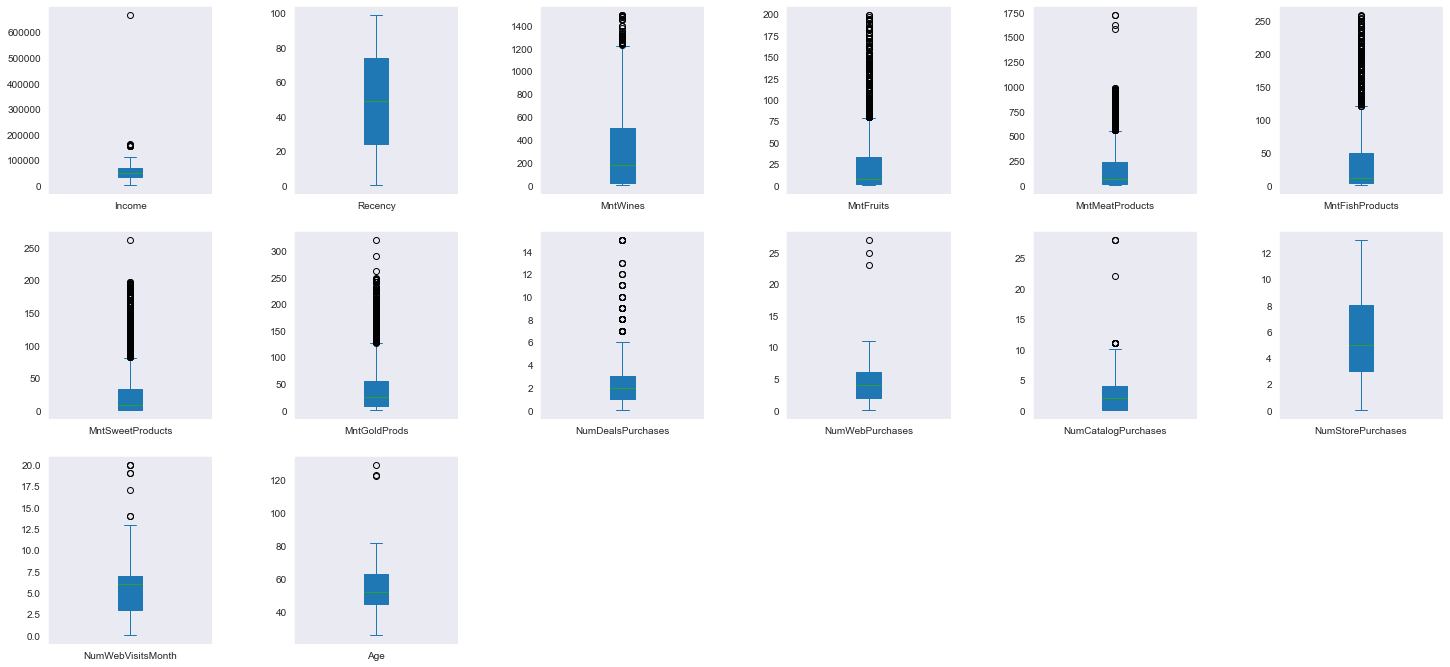

In [21]:
sns.set_style('dark')
df[num].plot(subplots=True, layout=(5,6), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [22]:
def dist_plot(df, cols):
  sns.set_style('dark')
  plt.figure(figsize=(25,20))
  for i, col in enumerate(cols):
    ax = plt.subplot(5,6, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.text(0.5,0.9,"skew= " + str(round(skew(df[col]),2)), bbox=dict(facecolor='yellow', alpha=0.5), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    plt.xlabel(col)
  plt.show()

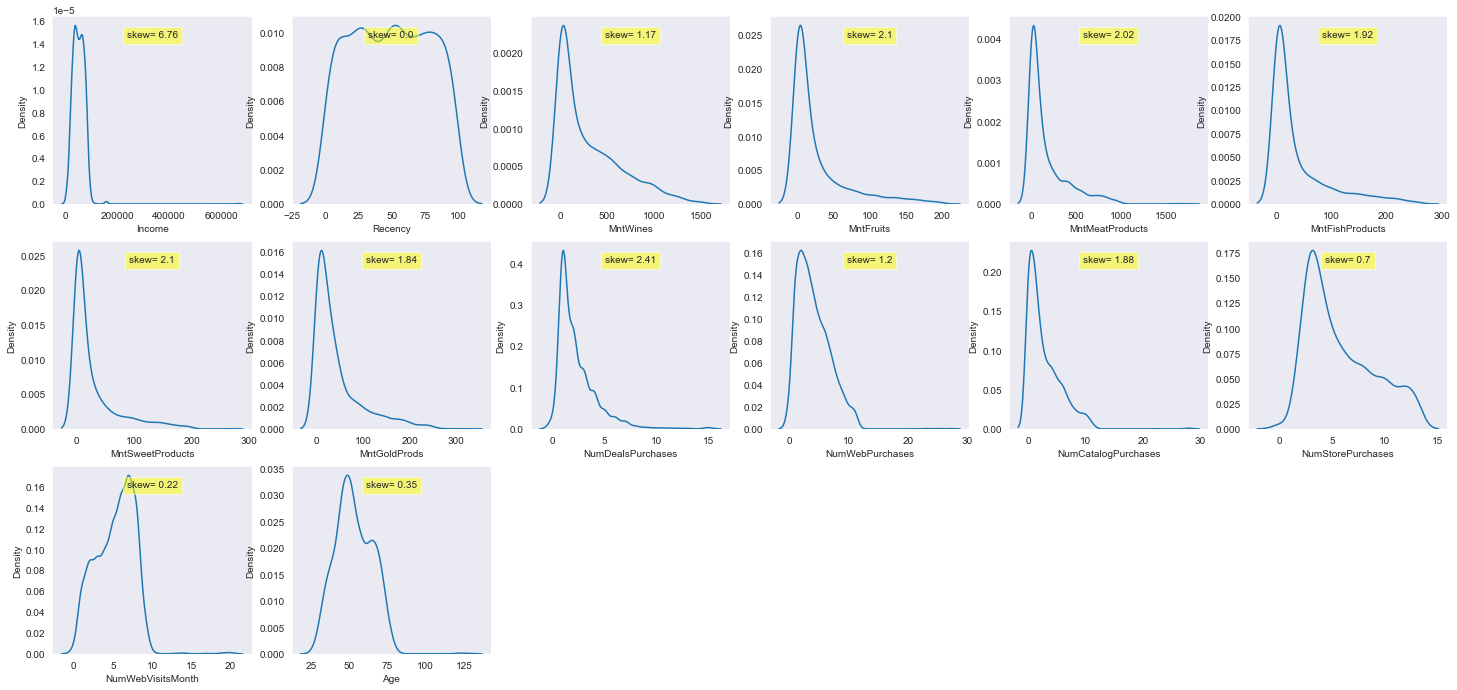

In [23]:
dist_plot(df, num)

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR=Q3-Q1
    lower= Q1-(1.5 * IQR)
    upper= Q3+(1.5 * IQR)
    return lower, upper

for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

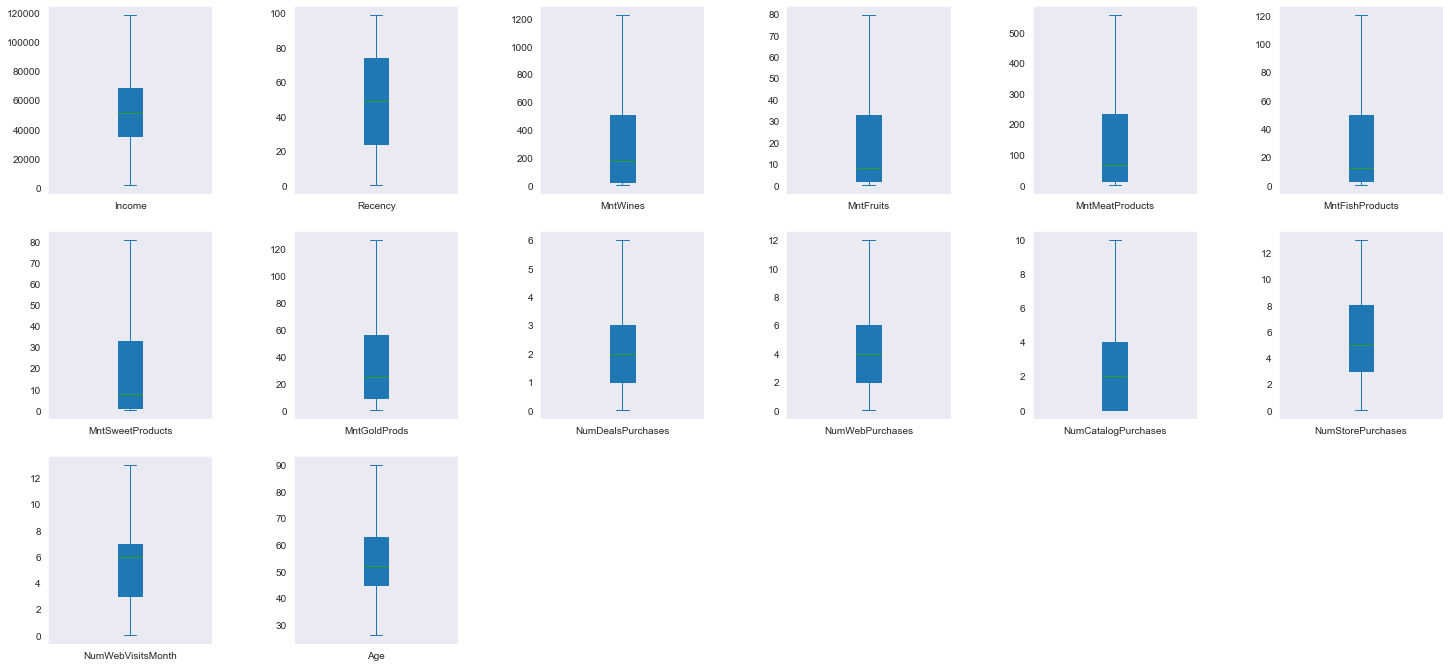

In [25]:
sns.set_style('dark')
df[num].plot(subplots=True, layout=(5,6), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [26]:
df1 = pd.get_dummies(data=df, drop_first=True)

In [27]:
df1

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     58138.0     58.0     635.0       79.5            546.0            120.5   
1     46344.0     38.0      11.0        1.0              6.0              2.0   
2     71613.0     26.0     426.0       49.0            127.0            111.0   
3     26646.0     26.0      11.0        4.0             20.0             10.0   
4     58293.0     94.0     173.0       43.0            118.0             46.0   
...       ...      ...       ...        ...              ...              ...   
2235  61223.0     46.0     709.0       43.0            182.0             42.0   
2236  64014.0     56.0     406.0        0.0             30.0              0.0   
2237  56981.0     91.0     908.0       48.0            217.0             32.0   
2238  69245.0      8.0     428.0       30.0            214.0             80.0   
2239  52869.0     40.0      84.0        3.0             61.0              2.0   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                 81.0          88.0                3.0              8.0  ...   
1                  1.0           6.0                2.0              1.0  ...   
2                 21.0          42.0                1.0              8.0  ...   
3                  3.0           5.0                2.0              2.0  ...   
4                 27.0          15.0                5.0              5.0  ...   
...                ...           ...                ...              ...  ...   
2235              81.0         126.5                2.0              9.0  ...   
2236               0.0           8.0                6.0              8.0  ...   
2237              12.0          24.0                1.0              2.0  ...   
2238              30.0          61.0                2.0              6.0  ...   
2239               1.0          21.0                3.0              3.0  ...   

      AcceptedCmp3_1  AcceptedCmp4_1  AcceptedCmp5_1  AcceptedCmp1_1  \
0                  0               0               0               0   
1                  0               0               0               0   
2                  0               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   
...              ...             ...             ...             ...   
2235               0               0               0               0   
2236               0               0               0               0   
2237               0               0               0               0   
2238               0               0               0               0   
2239               0               0               0               0   

      AcceptedCmp2_1  Complain_1  Response_1  Years_as_Customer_9  \
0                  0           0           1                    0   
1                  0           0           0                    0   
2                  0           0           0                    1   
3                  0           0           0                    0   
4                  0           0           0                    0   
...              ...         ...         ...                  ...   
2235               0           0           0                    1   
2236               0           0           0                    0   
2237               0           0           0                    0   
2238               0           0           0                    0   
2239               0           0           1                    0   

      Years_as_Customer_10  Has_Child_1  
0                        1            0  
1                        0            1  
2                        0            0  
3                        0            1  
4                        0            1  
...                    ...          ...  
2235                     0            1  
2236                     0     

## Feature Selection

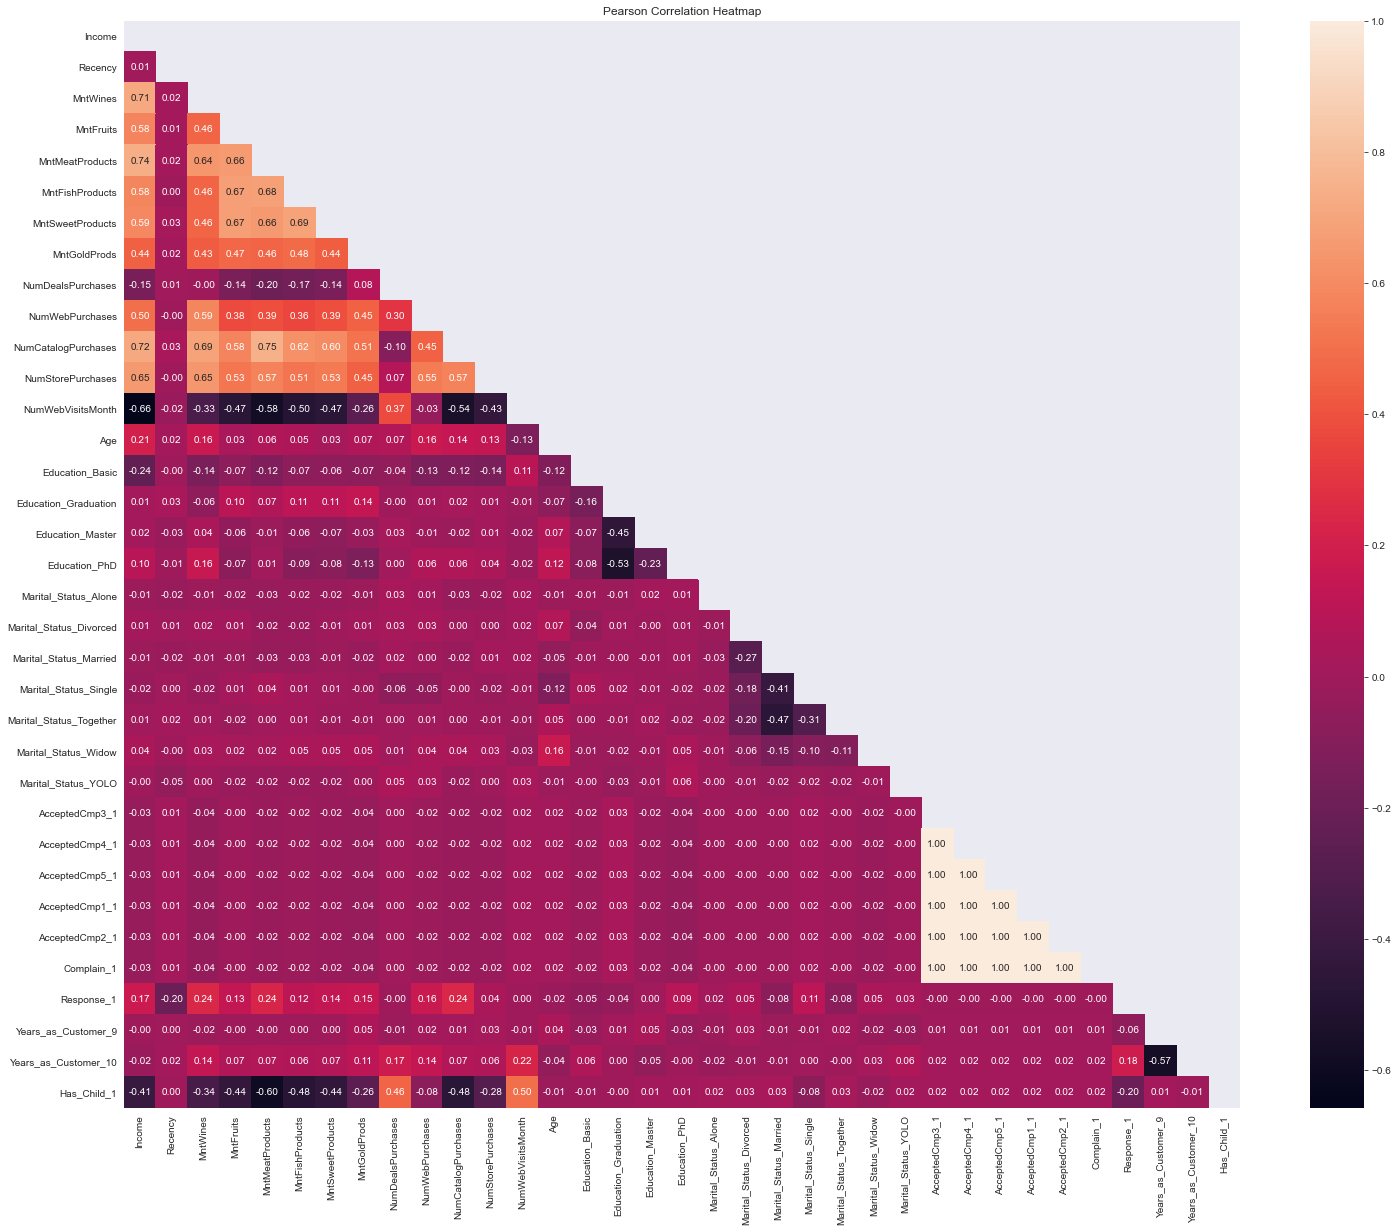

In [28]:
df_corr = df1.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

Findings:
- Thereshold 0.8
- Drop kolom AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, dan AcceptedCmp2
- Selain adanya multicollinearity features tersebut juga tidak memiliki korelasi dengan feature target
- Kita berfokus pada feature target yaitu Response

In [29]:
df.drop(['AcceptedCmp3'], axis = 1, inplace = True)
df.drop(['AcceptedCmp4'], axis = 1, inplace = True)
df.drop(['AcceptedCmp5'], axis = 1, inplace = True)
df.drop(['AcceptedCmp1'], axis = 1, inplace = True)
df.drop(['AcceptedCmp2'], axis = 1, inplace = True)

## Split the dataset

In [30]:
df['Response'] = df['Response'].astype('int64') 

In [31]:
X = df.drop('Response',axis=1)
y = df['Response']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [33]:
X_train.shape

(1551, 19)

In [34]:
X_test.shape

(665, 19)

## EDA

In [35]:
eda_ytrain = pd.DataFrame(y_train)

In [36]:
X_train_eda = pd.concat([X_train, y_train.drop(axis=1, columns=num)],axis=1)
X_train_eda

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
1223  Graduation        Married  40211.0     30.0      51.0        1.0   
300   Graduation       Divorced  35246.0     53.0      36.0        0.0   
679          PhD         Single  65295.0     19.0     365.0       32.0   
267          PhD        Married  38097.0     70.0      77.0        2.0   
1720  Graduation        Married  17688.0     82.0       2.0        2.0   
...          ...            ...      ...      ...       ...        ...   
320   Graduation        Married  64795.0     23.0     412.0        5.0   
1533      Master         Single  46098.0     86.0      57.0        0.0   
1618  Graduation        Married  69139.0     23.0      86.0       12.0   
1297  Graduation       Together  57811.0     49.0     545.0        7.0   
1888  Graduation       Together  76532.0     38.0     355.0       30.0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1223              7.0              2.0               1.0          25.0   
300              12.0              2.0               2.0          10.0   
679             117.0             34.0              81.0           6.0   
267              35.0              0.0               1.0          69.0   
1720              1.0              3.0               1.0           2.0   
...               ...              ...               ...           ...   
320             119.0             38.0              29.0          77.0   
1533             27.0              0.0               0.0          36.0   
1618             75.0             33.0              15.0           6.0   
1297            114.0             37.0              21.0          78.0   
1888            177.0             90.0              81.0          30.0   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1223                2.0              2.0                  1.0   
300                 4.0              3.0                  1.0   
679                 1.0              3.0                  3.0   
267                 4.0              3.0                  2.0   
1720                1.0              1.0                  0.0   
...                 ...              ...                  ...   
320                 3.0              3.0                  3.0   
1533                4.0              3.0                  2.0   
1618                1.0              4.0                  1.0   
1297                5.0              7.0                  2.0   
1888                4.0              9.0                  5.0   

      NumStorePurchases  NumWebVisitsMonth Complain Years_as_Customer   Age  \
1223                2.0                8.0        0                 9  41.0   
300                 3.0                5.0        0                 8  64.0   
679                13.0                2.0        0                 9  42.0   
267                 2.0                7.0        0                10  52.0   
1720                2.0                8.0        1                 9  43.0   
...                 ...                ...      ...               ...   ...   
320                12.0                2.0        0                 9  51.0   
1533                2.0                8.0        0                10  47.0   
1618                5.0                4.0        0                 8  57.0   
1297               11.0                5.0        0                 9  56.0   
1888                7.0                5.0        0                 9  47.0   

     Has_Child  Response  
1223         1         0  
300          1         0  
679          0         0  
267          1         1  
1720         1         0  
...        ...       ...  
320          1         0  
1533         1         1  
1618         1         0  
1297         1         0  
1888         1         0  

[1551 rows x 20 columns]

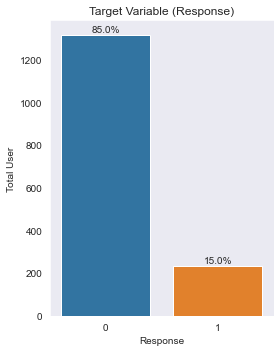

In [37]:
fig, ax = plt.subplots(figsize=(4,5))
ax = sns.countplot(x='Response', data=eda_ytrain)
plt.ylabel('Total User')
plt.title('Target Variable (Response)')
total_check = len(eda_ytrain)
for p in ax.patches:
      percentage = f'{100 * p.get_height() / total_check:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Finding :
- Pada target variable, terlihat bahwa pelanggan yang meresponse capaign lebih sedikit dibanding dengan yang tidak meresponse campaign

In [38]:
cat_1=[]
num_1=[]
for i in X_train.columns:
  if X_train[i].dtype=='object':
    cat_1.append(i)
  else:
    num_1.append(i)
print('cat = ',cat_1)
print('num = ',num_1)

cat =  ['Education', 'Marital_Status', 'Complain', 'Years_as_Customer', 'Has_Child']
num =  ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']


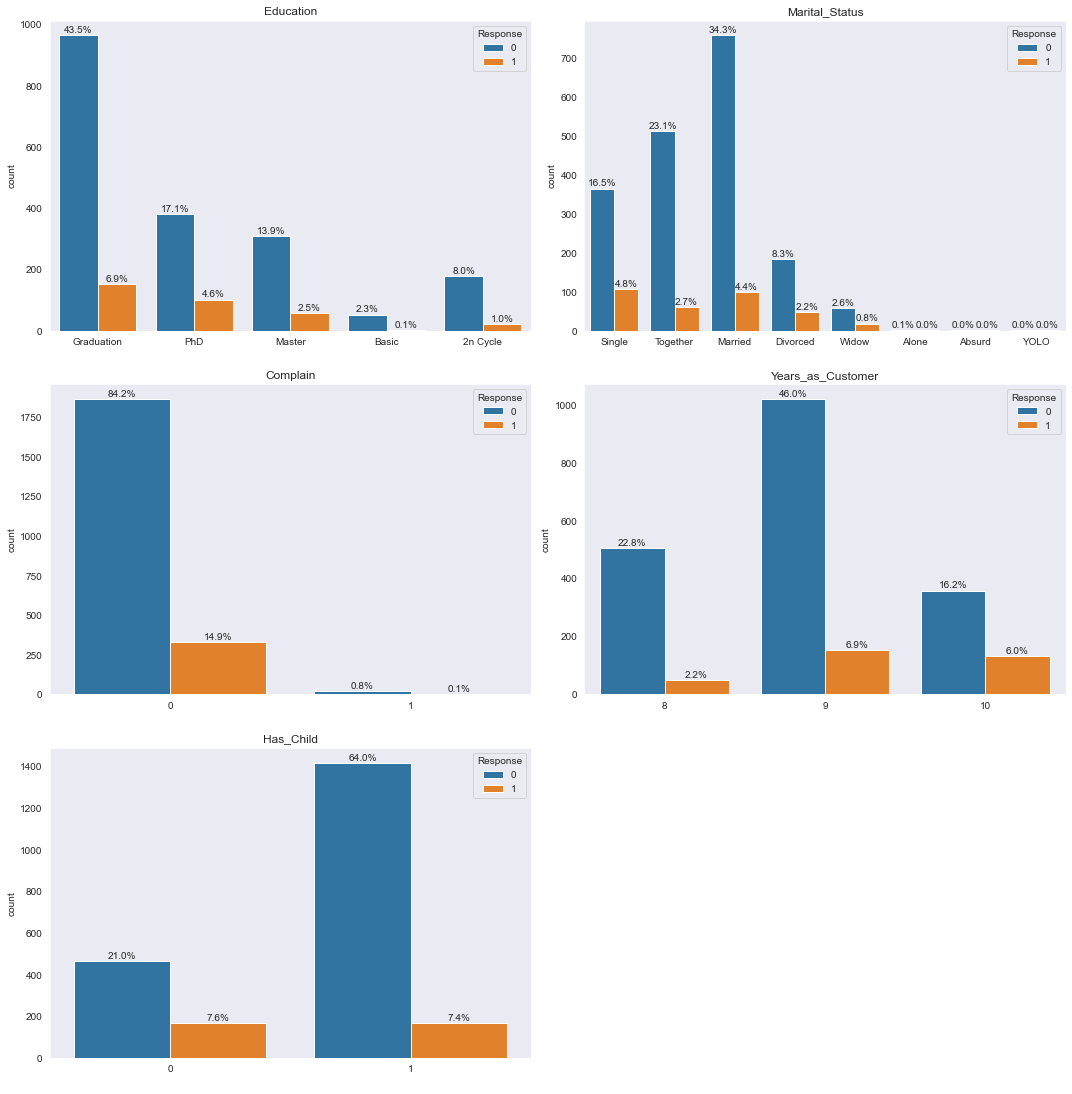

In [39]:
a = 1
plt.figure(figsize=[15,25])
df_n = df.loc[:,['Education', 'Marital_Status', 'Complain', 'Years_as_Customer', 'Has_Child','Response']]
for i in df_n.iloc[:,:-1].columns:
    plt.subplot(5,2,a)
    a+=1
    ax = sns.countplot(x=i, hue='Response', data=df_n)
    plt.title(i)
    plt.xlabel(' ')
    total = len(df_n)
    for p in ax.patches:
      percentage = f'{100 * p.get_height() / total:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Findings:
- Mayoritas pelanggan yang tidak menerima penawaran terakhir merupkan seorang yang telah atau baru lulus dalam pendidikan
- Mayoritas pelanggan yang tidak menerima penawaran terakhir adalah pelanggan yang sudah menikah
- Mayoritas pelanggan yang tidak menerima penawaran terakhir tidak pernah komplen
- Mayoritas pelanggan yang tidak menerima penawaran terakhir adalah pelanggan yang sudah menjadi pelanggan selama 9 tahun 
- Mayoritas pelanggan yang tidak menerima penawaran terakhir adalah pelanggan yang memiliki anak
- Nampaknya pelanggan yang tidak menerima penawaran terakhir merupakan pelanggan keluarga muda yang sudah memiliki anak atau pelanggan yang tinggal atau memiliki hubungan bersama
- Mayoritas pelanggan merupakan pelanggan yang royal

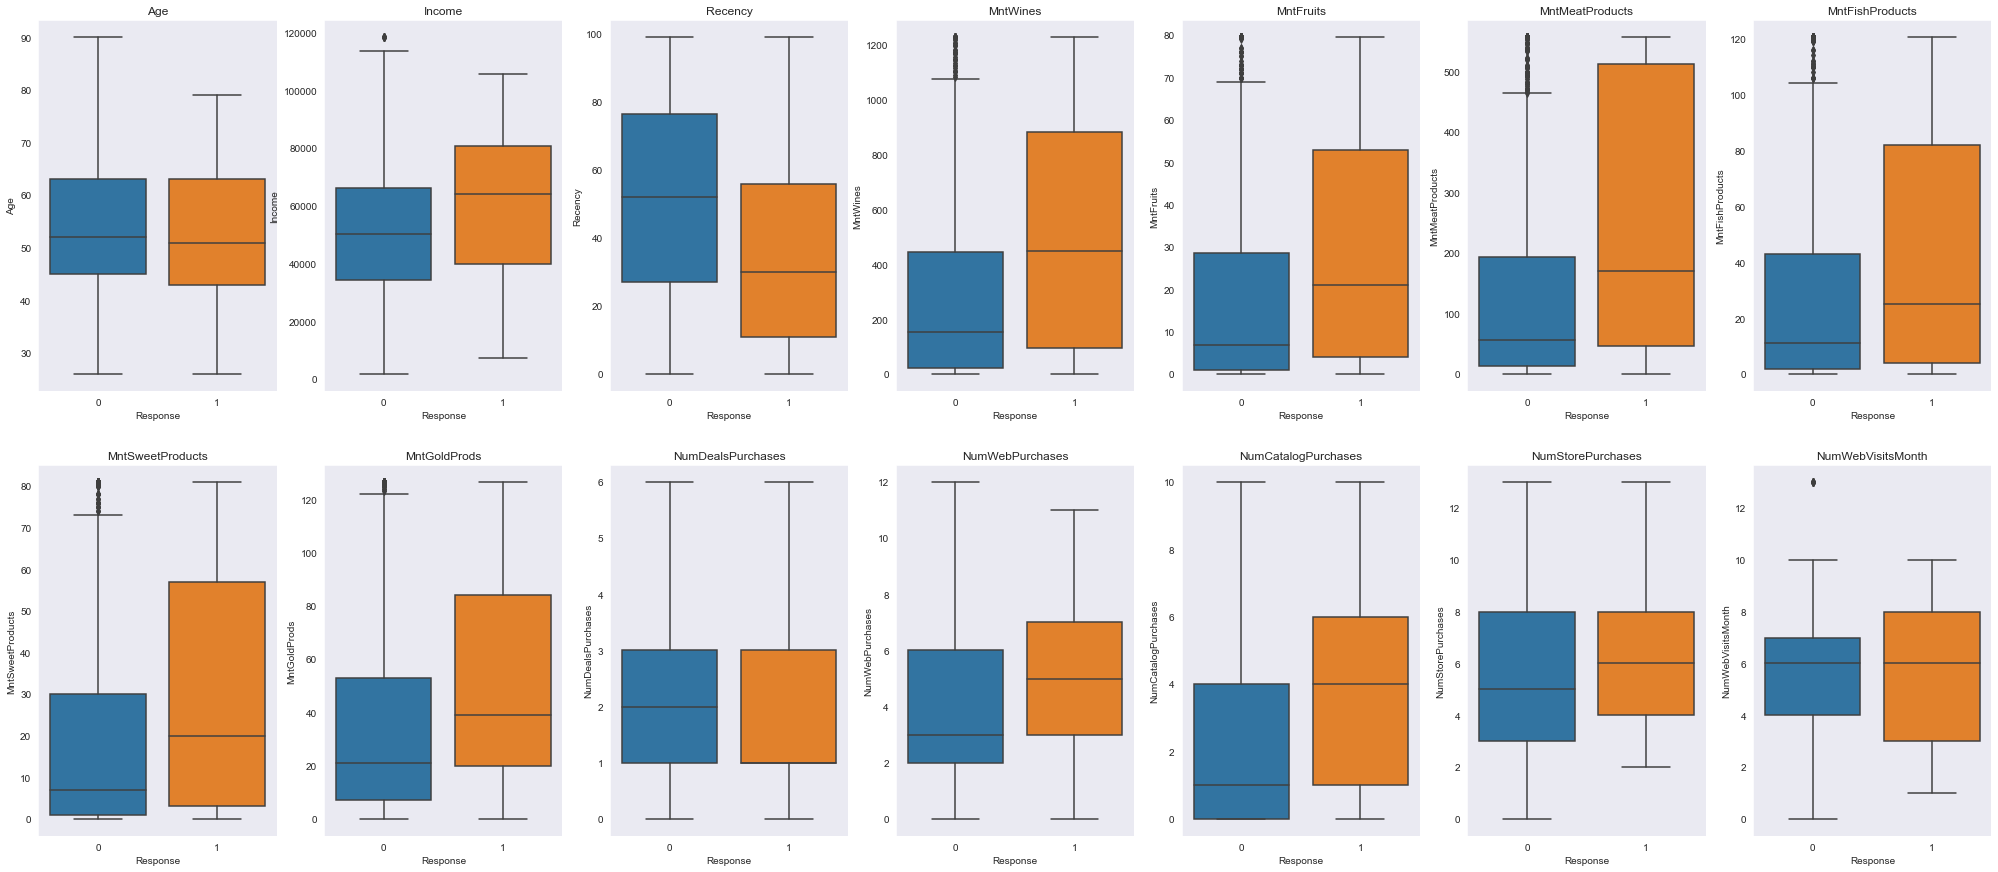

In [40]:
a = 1
df_n_check = df.loc[:,['Age', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                       'NumStorePurchases', 'NumWebVisitsMonth','Response']]
boxplot_cek = df_n_check.iloc[:,:-1]
fig, axes = plt.subplots(5,6,figsize=(35,15))
for i in boxplot_cek:
    plt.subplot(2,7,a)
    a+=1
    ax = sns.boxplot(y=i, x='Response', data=df_n_check)
    plt.title(i)

Findings :
- Pelanggan yang meresponse campaign merupakan pelanggan yang sangat aktif berbelanja, jika dilihat rata2 recency pelanggan yang meresponse campaign lebih kecil dari yang tidak meresponse
- Pelanggan yang meresponse campaign juga unggul dalam pembelanjaan dari tiap produk yang tersedia 
- Income pelanggan yang meresponse campaign jauh lebih tinggi dibandingkan dengan yang tidak meresponse campaign
- Untuk pelanggan yang tidak meresponse campaign lebih senang berbelanja langsung ditoko, namun jumlah kunjungan perbulan masih lebih sering pelanggan yang meresponse campaign
- Untuk pelanggan yang meresponse campaign cenderung suka berbelanja dengan menggunakan katalog dan web
- Ada kemungkinan bahwa strategi campaign dominan pada digital marketing dibandingkan dengan campaign offline, sehingga untuk pelanggan yang tidak meresponse campaign tidak mengetahui campaign yang sedang berjalan
- Perlu adanya skema campaign baru agar tingkat response campaign menjadi lebih tinggi menyesuakan dengan profil pelanggan (exp : campaign produk yang lebih dekat dengan kebutuhkan rumah tangga atau pelanggan yang berpasanagan dan promo mengikuti pola kebiasaan rumah tangga agar mudah diketahui)
- Dengan campaign yang menyesuaikan profil pelanggan, nantinya dapat membuat pola kebiasaan untuk bertransaksi, serta menencangkan promo atau pemberitahuan order melalui web atau catalog
- Rata-rata usia pelanggan yang meresponse campaign jauh lebih muda, namun mayoritas pelanggan yang tidak meresponse campaign jauh lebih tua, campaign yang diberikan kedepannya dapat menyesuaikan umur pada pelanggan yang tidak meresponse campaign sebelumnya

## Data Prepossesing

In [41]:
scaler = StandardScaler()
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train[num].astype('int64')), columns=num, index=X_train.index)
X_train_scaler.head()

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
1223 -0.563669 -0.680763 -0.762383  -0.769358        -0.808674   
300  -0.797435  0.116665 -0.807383  -0.806244        -0.780908   
679   0.617360 -1.062141  0.179615   0.374119        -0.197829   
267  -0.663202  0.706067 -0.684383  -0.732471        -0.653186   
1720 -1.624117  1.122117 -0.909383  -0.732471        -0.841993   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1223        -0.753434         -0.763185     -0.368929          -0.126894   
300         -0.753434         -0.727306     -0.745185           1.167929   
679          0.033304          2.107174     -0.845520          -0.774306   
267         -0.802605         -0.763185      0.734754           1.167929   
1720        -0.728848         -0.763185     -0.945855          -0.774306   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1223        -0.787883            -0.604299          -1.166668   
300         -0.410138            -0.604299          -0.862652   
679         -0.410138             0.122265           2.177506   
267         -0.410138            -0.241017          -1.166668   
1720        -1.165628            -0.967581          -1.166668   

      NumWebVisitsMonth       Age  
1223           1.150005 -1.050398  
300           -0.116797  0.899989  
679           -1.383600 -0.965598  
267            0.727738 -0.117604  
1720           1.150005 -0.880799

In [42]:
scaler = StandardScaler()
X_test_scaler = pd.DataFrame(scaler.fit_transform(X_test[num].astype('int64')), columns=num, index=X_test.index)
X_test_scaler.head()

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
1157  0.269870  0.152442 -0.124803   2.238544         0.517501   
1340 -0.049917  1.388709 -0.076003  -0.795404        -0.721428   
716   1.754735 -0.980803  0.140549   0.164706         2.006489   
1574 -0.443729  0.289805 -0.167503  -0.219338        -0.226993   
1504 -0.072246 -0.431351  2.690366   0.203110        -0.158795   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1157         2.262083          2.238492     -0.755370          -0.834144   
1340        -0.684856         -0.569193     -0.603550          -0.834144   
716          0.814018          2.238492      1.041164          -0.834144   
1574        -0.684856         -0.232271      0.282065           2.467676   
1504        -0.354595         -0.307142      0.003729          -0.173780   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1157         1.126464             0.162899          -0.543838   
1340         0.369034            -0.579072           0.090084   
716          0.369034             0.162899           0.724005   
1574         1.126464            -0.579072           0.090084   
1504         0.369034             2.759798          -0.226877   

      NumWebVisitsMonth       Age  
1157          -0.593303 -0.388360  
1340           0.279587  0.638176  
716           -1.466192  0.809265  
1574           1.152477 -0.644994  
1504           1.152477  1.236989

In [43]:
X_train = pd.concat([X_train_scaler, X_train.drop(axis=1, columns=num)],axis=1)
X_train

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
1223 -0.563669 -0.680763 -0.762383  -0.769358        -0.808674   
300  -0.797435  0.116665 -0.807383  -0.806244        -0.780908   
679   0.617360 -1.062141  0.179615   0.374119        -0.197829   
267  -0.663202  0.706067 -0.684383  -0.732471        -0.653186   
1720 -1.624117  1.122117 -0.909383  -0.732471        -0.841993   
...        ...       ...       ...        ...              ...   
320   0.593818 -0.923458  0.320614  -0.621812        -0.186723   
1533 -0.286491  1.260800 -0.744383  -0.806244        -0.697611   
1618  0.798346 -0.923458 -0.657383  -0.363608        -0.431061   
1297  0.264991 -0.022019  0.719613  -0.548039        -0.214489   
1888  1.146431 -0.403397  0.149615   0.300347         0.135359   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1223        -0.753434         -0.763185     -0.368929          -0.126894   
300         -0.753434         -0.727306     -0.745185           1.167929   
679          0.033304          2.107174     -0.845520          -0.774306   
267         -0.802605         -0.763185      0.734754           1.167929   
1720        -0.728848         -0.763185     -0.945855          -0.774306   
...               ...               ...           ...                ...   
320          0.131646          0.241440      0.935423           0.520517   
1533        -0.802605         -0.799065     -0.093009           1.167929   
1618         0.008718         -0.260872     -0.845520          -0.774306   
1297         0.107060         -0.045595      0.960507           1.815341   
1888         1.410094          2.107174     -0.243511           1.167929   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1223        -0.787883            -0.604299          -1.166668   
300         -0.410138            -0.604299          -0.862652   
679         -0.410138             0.122265           2.177506   
267         -0.410138            -0.241017          -1.166668   
1720        -1.165628            -0.967581          -1.166668   
...               ...                  ...                ...   
320         -0.410138             0.122265           1.873490   
1533        -0.410138            -0.241017          -1.166668   
1618        -0.032392            -0.604299          -0.254621   
1297         1.100844            -0.241017           1.569475   
1888         1.856335             0.848830           0.353411   

      NumWebVisitsMonth       Age   Education Marital_Status Complain  \
1223           1.150005 -1.050398  Graduation        Married        0   
300           -0.116797  0.899989  Graduation       Divorced        0   
679           -1.383600 -0.965598         PhD         Single        0   
267            0.727738 -0.117604         PhD        Married        0   
1720           1.150005 -0.880799  Graduation        Married        1   
...                 ...       ...         ...            ...      ...   
320           -1.383600 -0.202403  Graduation        Married        0   
1533           1.150005 -0.541601      Master         Single        0   
1618          -0.539065  0.306393  Graduation        Married        0   
1297          -0.116797  0.221594  Graduation       Together        0   
1888          -0.116797 -0.541601  Graduation       Together        0   

     Years_as_Customer Has_Child  
1223                 9         1  
300                  8         1  
679                  9         0  
267                 10         1  
1720                 9         1  
...                ...       ...  
320                  9         1  
1533                10         1  
1618                 8         1  
1297                 9         1  
1888                 9         1  

[1551 rows x 19 columns]

In [44]:
X_test = pd.concat([X_test_scaler, X_test.drop(axis=1, columns=num)],axis=1)
X_test

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
1157  0.269870  0.152442 -0.124803   2.238544         0.517501   
1340 -0.049917  1.388709 -0.076003  -0.795404        -0.721428   
716   1.754735 -0.980803  0.140549   0.164706         2.006489   
1574 -0.443729  0.289805 -0.167503  -0.219338        -0.226993   
1504 -0.072246 -0.431351  2.690366   0.203110        -0.158795   
...        ...       ...       ...        ...              ...   
802  -0.792059  0.495850 -0.826308   0.087897        -0.675963   
1809  0.582667  0.907939  2.031562   0.510345         2.319062   
1622  0.752803  1.045302  0.302200   2.238544         1.699598   
1571 -0.590129  1.526072 -0.808008  -0.757000        -0.761210   
276   0.463985  0.289805 -0.252904   2.238544         0.432253   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1157         2.262083          2.238492     -0.755370          -0.834144   
1340        -0.684856         -0.569193     -0.603550          -0.834144   
716          0.814018          2.238492      1.041164          -0.834144   
1574        -0.684856         -0.232271      0.282065           2.467676   
1504        -0.354595         -0.307142      0.003729          -0.173780   
...               ...               ...           ...                ...   
802         -0.049740         -0.269707      0.206155           0.486584   
1809         1.474539          2.238492     -0.046878          -0.834144   
1622         2.262083          2.238492     -0.173394          -0.834144   
1571        -0.786474         -0.793808     -0.856583           0.486584   
276          1.779395          2.238492      2.205116          -0.173780   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1157         1.126464             0.162899          -0.543838   
1340         0.369034            -0.579072           0.090084   
716          0.369034             0.162899           0.724005   
1574         1.126464            -0.579072           0.090084   
1504         0.369034             2.759798          -0.226877   
...               ...                  ...                ...   
802         -0.767112            -0.579072          -0.543838   
1809        -0.388397             0.904870           0.724005   
1622         0.369034             1.646841           0.090084   
1571        -0.767112            -0.950058          -0.860798   
276          1.126464             0.533885           1.357926   

      NumWebVisitsMonth       Age   Education Marital_Status Complain  \
1157          -0.593303 -0.388360  Graduation       Together        0   
1340           0.279587  0.638176  Graduation       Together        0   
716           -1.466192  0.809265    2n Cycle       Divorced        0   
1574           1.152477 -0.644994  Graduation        Married        0   
1504           1.152477  1.236989         PhD         Single        0   
...                 ...       ...         ...            ...      ...   
802            0.279587  1.579167  Graduation        Married        0   
1809          -1.029747 -0.388360         PhD         Single        0   
1622          -1.029747 -1.072717    2n Cycle       Together        0   
1571           1.152477  1.322533  Graduation        Married        1   
276           -0.156858  1.151444  Graduation         Single        0   

     Years_as_Customer Has_Child  
1157                10         0  
1340                 8         1  
716                 10         0  
1574                10         1  
1504                10         0  
...                ...       ...  
802                  9         1  
1809                10         0  
1622                10         0  
1571                10         1  
276                  9         0  

[665 rows x 19 columns]

In [45]:
X_train = pd.get_dummies(data=X_train, drop_first=True)

In [46]:
X_train

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
1223 -0.563669 -0.680763 -0.762383  -0.769358        -0.808674   
300  -0.797435  0.116665 -0.807383  -0.806244        -0.780908   
679   0.617360 -1.062141  0.179615   0.374119        -0.197829   
267  -0.663202  0.706067 -0.684383  -0.732471        -0.653186   
1720 -1.624117  1.122117 -0.909383  -0.732471        -0.841993   
...        ...       ...       ...        ...              ...   
320   0.593818 -0.923458  0.320614  -0.621812        -0.186723   
1533 -0.286491  1.260800 -0.744383  -0.806244        -0.697611   
1618  0.798346 -0.923458 -0.657383  -0.363608        -0.431061   
1297  0.264991 -0.022019  0.719613  -0.548039        -0.214489   
1888  1.146431 -0.403397  0.149615   0.300347         0.135359   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1223        -0.753434         -0.763185     -0.368929          -0.126894   
300         -0.753434         -0.727306     -0.745185           1.167929   
679          0.033304          2.107174     -0.845520          -0.774306   
267         -0.802605         -0.763185      0.734754           1.167929   
1720        -0.728848         -0.763185     -0.945855          -0.774306   
...               ...               ...           ...                ...   
320          0.131646          0.241440      0.935423           0.520517   
1533        -0.802605         -0.799065     -0.093009           1.167929   
1618         0.008718         -0.260872     -0.845520          -0.774306   
1297         0.107060         -0.045595      0.960507           1.815341   
1888         1.410094          2.107174     -0.243511           1.167929   

      NumWebPurchases  ...  Marital_Status_Divorced  Marital_Status_Married  \
1223        -0.787883  ...                        0                       1   
300         -0.410138  ...                        1                       0   
679         -0.410138  ...                        0                       0   
267         -0.410138  ...                        0                       1   
1720        -1.165628  ...                        0                       1   
...               ...  ...                      ...                     ...   
320         -0.410138  ...                        0                       1   
1533        -0.410138  ...                        0                       0   
1618        -0.032392  ...                        0                       1   
1297         1.100844  ...                        0                       0   
1888         1.856335  ...                        0                       0   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
1223                      0                        0                     0   
300                       0                        0                     0   
679                       1                        0                     0   
267                       0                        0                     0   
1720                      0                        0                     0   
...                     ...                      ...                   ...   
320                       0                        0                     0   
1533                      1                        0                     0   
1618                      0                        0                     0   
1297                      0                        1                     0   
1888                      0                        1                     0   

      Marital_Status_YOLO  Complain_1  Years_as_Customer_9  \
1223                    0           0                    1   
300                     0           0                    0   
679                     0           0                    1   
267                     0           0                    0   
1720                    0           1                    1   
...                   ...         ...       

In [47]:
X_train.drop(['Marital_Status_YOLO'], axis = 1, inplace = True)

In [112]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 1157 to 276
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   665 non-null    float64
 1   Recency                  665 non-null    float64
 2   MntWines                 665 non-null    float64
 3   MntFruits                665 non-null    float64
 4   MntMeatProducts          665 non-null    float64
 5   MntFishProducts          665 non-null    float64
 6   MntSweetProducts         665 non-null    float64
 7   MntGoldProds             665 non-null    float64
 8   NumDealsPurchases        665 non-null    float64
 9   NumWebPurchases          665 non-null    float64
 10  NumCatalogPurchases      665 non-null    float64
 11  NumStorePurchases        665 non-null    float64
 12  NumWebVisitsMonth        665 non-null    float64
 13  Age                      665 non-null    float64
 14  Education_Basic        

In [50]:
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [51]:
X_test

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
1157  0.269870  0.152442 -0.124803   2.238544         0.517501   
1340 -0.049917  1.388709 -0.076003  -0.795404        -0.721428   
716   1.754735 -0.980803  0.140549   0.164706         2.006489   
1574 -0.443729  0.289805 -0.167503  -0.219338        -0.226993   
1504 -0.072246 -0.431351  2.690366   0.203110        -0.158795   
...        ...       ...       ...        ...              ...   
802  -0.792059  0.495850 -0.826308   0.087897        -0.675963   
1809  0.582667  0.907939  2.031562   0.510345         2.319062   
1622  0.752803  1.045302  0.302200   2.238544         1.699598   
1571 -0.590129  1.526072 -0.808008  -0.757000        -0.761210   
276   0.463985  0.289805 -0.252904   2.238544         0.432253   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1157         2.262083          2.238492     -0.755370          -0.834144   
1340        -0.684856         -0.569193     -0.603550          -0.834144   
716          0.814018          2.238492      1.041164          -0.834144   
1574        -0.684856         -0.232271      0.282065           2.467676   
1504        -0.354595         -0.307142      0.003729          -0.173780   
...               ...               ...           ...                ...   
802         -0.049740         -0.269707      0.206155           0.486584   
1809         1.474539          2.238492     -0.046878          -0.834144   
1622         2.262083          2.238492     -0.173394          -0.834144   
1571        -0.786474         -0.793808     -0.856583           0.486584   
276          1.779395          2.238492      2.205116          -0.173780   

      NumWebPurchases  ...  Education_PhD  Marital_Status_Divorced  \
1157         1.126464  ...              0                        0   
1340         0.369034  ...              0                        0   
716          0.369034  ...              0                        1   
1574         1.126464  ...              0                        0   
1504         0.369034  ...              1                        0   
...               ...  ...            ...                      ...   
802         -0.767112  ...              0                        0   
1809        -0.388397  ...              1                        0   
1622         0.369034  ...              0                        0   
1571        -0.767112  ...              0                        0   
276          1.126464  ...              0                        0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
1157                       0                      0                        1   
1340                       0                      0                        1   
716                        0                      0                        0   
1574                       1                      0                        0   
1504                       0                      1                        0   
...                      ...                    ...                      ...   
802                        1                      0                        0   
1809                       0                      1                        0   
1622                       0                      0                        1   
1571                       1                      0                        0   
276                        0                      1                        0   

      Marital_Status_Widow  Complain_1  Years_as_Customer_9  \
1157                     0           0                    0   
1340                     0           0                    0   
716                      0           0                    0   
1574                     0           0                    0   
1504                     0           0                    0   
...                    ...         ...                  ...   
802                      0           0                    1

## Balanced Data

In [52]:
sm = over_sampling.SMOTE(random_state=42)
X_train_SMT, y_train_SMT = sm.fit_sample(X_train, y_train.ravel())

In [53]:
print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_SMT))

Before SMOTE: Counter({0: 1318, 1: 233})
After SMOTE: Counter({0: 1318, 1: 1318})


## Checking the overfitting data berfore modeling

In [54]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20,
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[27]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Minimum validation loss: 0.021439505741000175


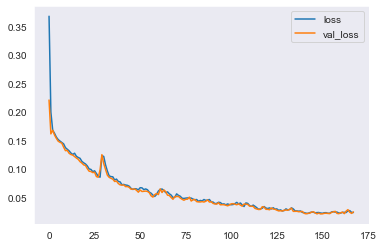

In [55]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_train, y_train),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

## Modeling & Evaluation

### Logistic Regression

In [56]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_SMT, y_train_SMT)
lr_preds = lr_model.predict(X_test)
ytrain_predict_1 = lr_model.predict(X_train_SMT)

In [57]:
print('Train_score_LR :', lr_model.score(X_train_SMT, y_train_SMT))

Train_score_LR : 0.8660849772382397


In [58]:
print('LR_AUC_TRAIN :',roc_auc_score(y_train_SMT, ytrain_predict_1))

LR_AUC_TRAIN : 0.8660849772382397


In [59]:
print('Akurasi :',accuracy_score(y_test, lr_preds))

Akurasi : 0.837593984962406


In [60]:
print('LR_AUC :',roc_auc_score(y_test, lr_preds))

LR_AUC : 0.7110176991150442


### Cross validation Score

In [61]:
cv_result = cross_val_score(
    estimator=lr_model,
    X=X_train_SMT,
    y=y_train_SMT,
    cv=10,
    n_jobs=1
)

In [62]:
print('CV accuracy scores: %s' % cv_result)

CV accuracy scores: [0.70454545 0.74621212 0.875      0.90151515 0.91666667 0.87121212
 0.90114068 0.87072243 0.90114068 0.87452471]


In [63]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_result),np.std(cv_result)))

CV accuracy: 0.856 +/- 0.068


### Classification Report

In [64]:
pd.DataFrame(metrics.classification_report(y_test, lr_preds, target_names=['not response','response'], output_dict=True))

not response    response  accuracy   macro avg  weighted avg
precision      0.914701    0.464912  0.837594    0.689806      0.847063
recall         0.892035    0.530000  0.837594    0.711018      0.837594
f1-score       0.903226    0.495327  0.837594    0.699276      0.841888
support      565.000000  100.000000  0.837594  665.000000    665.000000

In [65]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       565
           1       0.46      0.53      0.50       100

    accuracy                           0.84       665
   macro avg       0.69      0.71      0.70       665
weighted avg       0.85      0.84      0.84       665



### Confusion Matrix

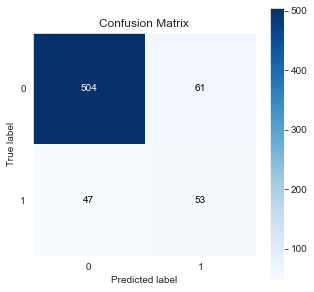

In [66]:
skplt.metrics.plot_confusion_matrix(y_test, lr_preds, figsize=(5,5));

## KNN

In [67]:
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train_SMT, y_train_SMT)
pred_result = knn_clf.predict(X_test)
pred_proba_result = knn_clf.predict_proba(X_test)
ytrain_predict_1_knn = knn_clf.predict(X_train_SMT)

In [68]:
print('Train_score_LR :', knn_clf.score(X_train_SMT, y_train_SMT))

Train_score_LR : 0.9389226100151745


In [69]:
print('LR_AUC_TRAIN :',roc_auc_score(y_train_SMT, ytrain_predict_1_knn))

LR_AUC_TRAIN : 0.9389226100151745


In [70]:
print('Akurasi :',accuracy_score(y_test, pred_result))

Akurasi : 0.7879699248120301


In [71]:
print('DT_AUC :',roc_auc_score(y_test, pred_result))

DT_AUC : 0.7023893805309734


### Cross validation Score

In [72]:
cv_result = cross_val_score(
    estimator=knn_clf,
    X=X_train_SMT,
    y=y_train_SMT,
    cv=10,
    n_jobs=1
)

In [73]:
print('CV accuracy scores: %s' % cv_result)

CV accuracy scores: [0.85984848 0.92424242 0.89015152 0.87878788 0.90151515 0.90151515
 0.85551331 0.88593156 0.878327   0.90114068]


In [74]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_result),np.std(cv_result)))

CV accuracy: 0.888 +/- 0.020


### Classification Report

In [75]:
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not response','response'], output_dict=True))

not response    response  accuracy   macro avg  weighted avg
precision      0.917323    0.369427   0.78797    0.643375      0.834932
recall         0.824779    0.580000   0.78797    0.702389      0.787970
f1-score       0.868593    0.451362   0.78797    0.659977      0.805851
support      565.000000  100.000000   0.78797  665.000000    665.000000

In [76]:
print(classification_report(y_test, pred_result))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       565
           1       0.37      0.58      0.45       100

    accuracy                           0.79       665
   macro avg       0.64      0.70      0.66       665
weighted avg       0.83      0.79      0.81       665



### Confusion Matrix

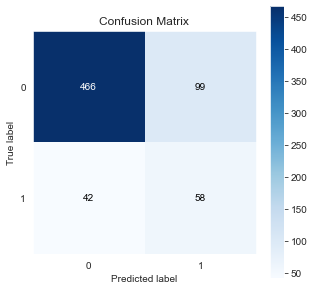

In [77]:
skplt.metrics.plot_confusion_matrix(y_test, pred_result, figsize=(5,5));

### Naive Bayes

In [78]:
gnb = GaussianNB()
gnb.fit(X_train_SMT, y_train_SMT)
gnb_preds = gnb.predict(X_test)
ytrain_predict_1_gnb = gnb.predict(X_train_SMT)

In [79]:
print('Train_score_LR :', gnb.score(X_train_SMT, y_train_SMT))

Train_score_LR : 0.7090288315629742


In [80]:
print('LR_AUC_TRAIN :',roc_auc_score(y_train_SMT, ytrain_predict_1_gnb))

LR_AUC_TRAIN : 0.7090288315629742


In [81]:
print('Akurasi :',accuracy_score(y_test, gnb_preds))

Akurasi : 0.631578947368421


In [82]:
print('DT_AUC :',roc_auc_score(y_test, gnb_preds))

DT_AUC : 0.6185840707964602


### Cross validation Score

In [83]:
cv_result = cross_val_score(
    estimator=gnb,
    X=X_train_SMT,
    y=y_train_SMT,
    cv=10,
    n_jobs=1
)

In [84]:
print('CV accuracy scores: %s' % cv_result)

CV accuracy scores: [0.54166667 0.71212121 0.70075758 0.69318182 0.69318182 0.71969697
 0.71863118 0.69581749 0.74524715 0.71863118]


In [85]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_result),np.std(cv_result)))

CV accuracy: 0.694 +/- 0.053


### Classification Report

In [86]:
pd.DataFrame(metrics.classification_report(y_test, gnb_preds, target_names=['not response','response'], output_dict=True))

not response    response  accuracy   macro avg  weighted avg
precision      0.900000    0.226415  0.631579    0.563208      0.798709
recall         0.637168    0.600000  0.631579    0.618584      0.631579
f1-score       0.746114    0.328767  0.631579    0.537441      0.683355
support      565.000000  100.000000  0.631579  665.000000    665.000000

In [87]:
print(classification_report(y_test, gnb_preds))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75       565
           1       0.23      0.60      0.33       100

    accuracy                           0.63       665
   macro avg       0.56      0.62      0.54       665
weighted avg       0.80      0.63      0.68       665



### Confusion Matrix

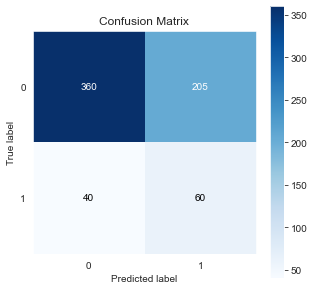

In [88]:
skplt.metrics.plot_confusion_matrix(y_test, gnb_preds, figsize=(5,5));

### Random Forest

In [89]:
rf_model = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators= 200, random_state=42)
rf_model.fit(X_train_SMT, y_train_SMT)
rf_preds = rf_model.predict(X_test)
ytrain_predict_3 = rf_model.predict(X_train_SMT)

In [90]:
print('Train_Score_Rf :', rf_model.score(X_train_SMT, y_train_SMT))

Train_Score_Rf : 0.9798937784522003


In [91]:
print('RF_AUC_TRAIN :',roc_auc_score(y_train_SMT, ytrain_predict_3))

RF_AUC_TRAIN : 0.9798937784522004


In [92]:
print('Akurasi :',accuracy_score(y_test, rf_preds))

Akurasi : 0.837593984962406


In [93]:
print('RF_AUC :',roc_auc_score(y_test, rf_preds))

RF_AUC : 0.7398230088495574


### Cross validation Score

In [94]:
cv_result = cross_val_score(
    estimator=rf_model,
    X=X_train_SMT,
    y=y_train_SMT,
    cv=10,
    n_jobs=1
)

In [95]:
print('CV accuracy scores: %s' % cv_result)

CV accuracy scores: [0.81439394 0.87878788 0.94318182 0.96590909 0.93560606 0.95075758
 0.94676806 0.95437262 0.9581749  0.94676806]


In [96]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_result),np.std(cv_result)))

CV accuracy: 0.929 +/- 0.045


### Classification Report

In [97]:
pd.DataFrame(metrics.classification_report(y_test, rf_preds, target_names=['not response','response'], output_dict=True))

not response    response  accuracy   macro avg  weighted avg
precision      0.925512    0.468750  0.837594    0.697131      0.856826
recall         0.879646    0.600000  0.837594    0.739823      0.837594
f1-score       0.901996    0.526316  0.837594    0.714156      0.845503
support      565.000000  100.000000  0.837594  665.000000    665.000000

In [98]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       565
           1       0.47      0.60      0.53       100

    accuracy                           0.84       665
   macro avg       0.70      0.74      0.71       665
weighted avg       0.86      0.84      0.85       665



### Confusion Matrix

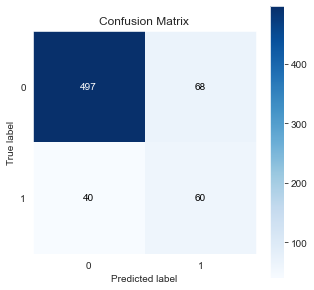

In [99]:
skplt.metrics.plot_confusion_matrix(y_test, rf_preds, figsize=(5,5));

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [102]:
CV_rfc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, max_features='log2',
                                              n_estimators=200,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [103]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

### ROC AUC Curve

### Train

In [104]:
model_lr = LogisticRegression().fit(X_train_SMT, y_train_SMT)
probs_lr = model_lr.predict_proba(X_train_SMT)[:, 1]

model_knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train_SMT, y_train_SMT)
probs_knn = model_knn.predict_proba(X_train_SMT)[:, 1]

model_gnb = GaussianNB().fit(X_train_SMT, y_train_SMT)
probs_gnb = model_gnb.predict_proba(X_train_SMT)[:, 1]

model_rf = RandomForestClassifier().fit(X_train_SMT, y_train_SMT)
probs_rf = model_rf.predict_proba(X_train_SMT)[:, 1]

In [105]:
y_train_res = pd.Series(y_train_SMT)

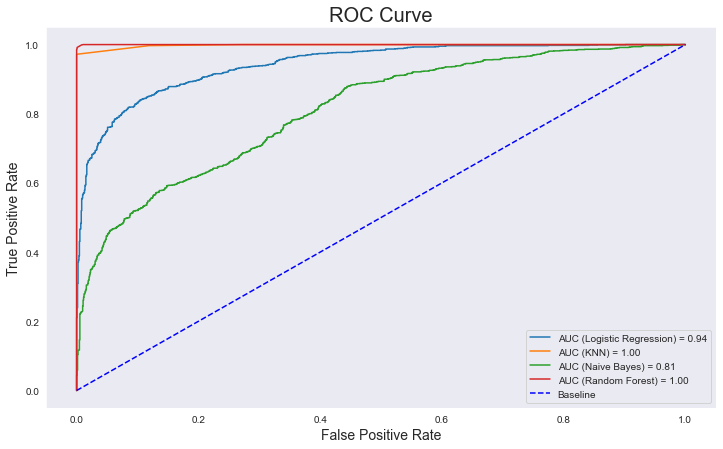

In [106]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_train_res.replace({'Good': 1, 'Bad': 0})
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_dt = roc_auc_score(y_test_int, probs_knn)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_int, probs_knn)

auc_rf = roc_auc_score(y_test_int, probs_gnb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, probs_gnb)

auc_xg = roc_auc_score(y_test_int, probs_rf)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test_int, probs_rf)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (KNN) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Naive Bayes) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (Random Forest) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

### Test

In [107]:
model_lr = LogisticRegression().fit(X_train_SMT, y_train_SMT)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train_SMT, y_train_SMT)
probs_knn = model_knn.predict_proba(X_test)[:, 1]

model_gnb = GaussianNB().fit(X_train_SMT, y_train_SMT)
probs_gnb = model_gnb.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train_SMT, y_train_SMT)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

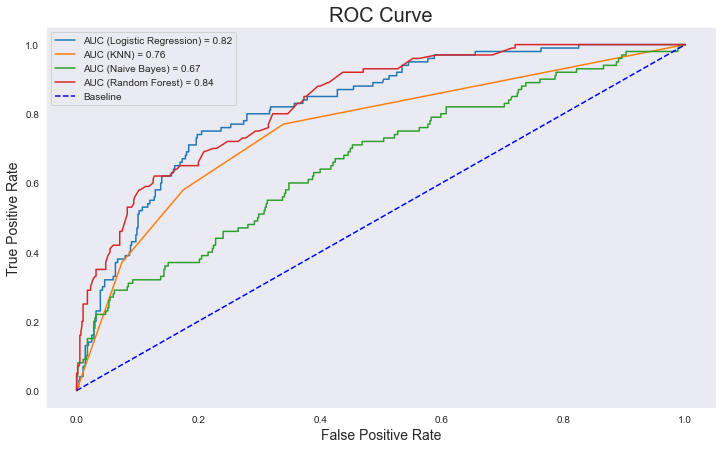

In [108]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_test.replace({'Good': 1, 'Bad': 0})
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_dt = roc_auc_score(y_test_int, probs_knn)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_int, probs_knn)

auc_rf = roc_auc_score(y_test_int, probs_gnb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, probs_gnb)

auc_xg = roc_auc_score(y_test_int, probs_rf)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test_int, probs_rf)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (KNN) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Naive Bayes) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (Random Forest) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

### Model conclusion

Findings:
- Jika dibandingan dengan model baseline model terbaik merupakan random forest terbaik merupakan 
- Untuk model baseline yang terbaik merupakan Logistic Regression
- Namun, nampaknya modeling yang dilakukan overfitting, dimana data train dan test berbeda jauh pada saat dievaluasi
- Perlu adanya perbaikan dari sisi prepossesing atau cleaning
- Ouliers sangat banyak, data yang skew, serta pemilihan features harus lebih tepat
- Lebih baik permodelan dengan metode imbalanced data, dengan F1 score sebagai acuan evaluasi 
- Jika hanya ingin melakukan pengecekan profil customer, lebih baik menggunakan unsupervised learning, atau hanya melakukan EDA plot untuk mengetahui faktor yang sangat mempengaruhi user meresponse campaign

## Feature Importance 

In [109]:
clf = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators= 200, random_state=42).fit(X_test,y_test)

impFeature = pd.Series(data = clf.feature_importances_, index = X_test.columns).sort_values(ascending = False)

fig = go.Figure(go.Bar(
            x = impFeature.index,
            y = impFeature.values
            ))

fig.update_layout({"title": {"text": "Feature Importance using Random Forest Classifier",
                             "font": {"size": 20}}})
fig.show()


Findings:
- Recency, Income, Wines, Meat, Gold Prods, Age, Catalog, Store, Sweet Products, dan Fish Produk merupakan top 10 features yang sangat mempengaruhi pelanggan dalam meresponse campaign
- Terlihat juga dari features tersebut sangat cocok dengan EDA yang telah dilakukan sebelumnya, features tersebut sangat cocok pada pelanggan yang meresponse campaign, dimana pelanggan yang meresponse campaing sangat dominan pada features tersebut
- Fetaures importance dapat menjadi acuan untuk memaksimalkan campaign yang akan dilakukan untuk kedepannya

In [110]:
feature_names = X_train_SMT.columns

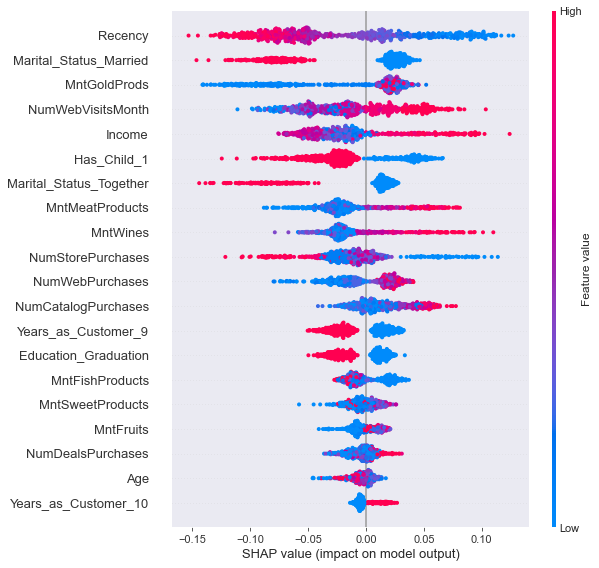

In [111]:
import shap 
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

Findings:
- Terlihat berbeda dengan feature imprtance pada random forest namun mirip
- Kita bisa lihat pengaruh antar tiap pelanggan yang meresponse dan tidak meresponse pelanggan
- Recency san Gold Prods sangat dominan pada pelanggan yang tidak meresponse campaign, sehingga perbaikan dapat dilakukan pada rencency bisa diutamakan 
- Feature has child juga sangat dominan dalam pelanggan yang meresponse campaign, hal ini bisa menjadi acuan untuk campaign yang ramah untuk keluarga, dan kita juga mengetahui bahwa pelanggan yang tidak meresponse campaign rata-rata adalah pelanggan yang sudah menikah atau berpasangan

Notes : 
- Red indicates high feature value (Response)
- Blue indicates low feature value (no Response)

## Conclusion

Findings:
- Model terbaik yang dapat dipilih adalah random forest, dimana model yang paling stabil dibandingkan dengan model baseline
- Namun, perlu ada perbaikan pada preprossing, data cleaning, serta feature selection agar model bisa berjalan dengan baik dan tidak overfitting
- Baiknya melakukan permodelan dengan imbalanced data yang berfokus pada F1
- Jika memnggunakan balanced data maka kita bisa berfokus pada recall yang merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif

## Recommendation

Findings:
- Melakukan campaign menyesuaikan dengan profil pelanggan yang tidak meresponse campaign
- Usia, produk, pendapatan, recendy, serta status dapat dijadiakan acuan dapat menentukan campaign yang akan dijalani sesuai dengan features importance
- Campaign lebih ramah pada kalangan berkeluarga serta ramah dengan orang tua, sehingga dapat meningkatkan response pelanggan terhadap campaign